In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bengali-ged/DataSetFold1_u.csv
/kaggle/input/bengali-ged/DataSetFold2.csv
/kaggle/input/bengali-ged/SampleSubmission.csv
/kaggle/input/bengali-ged/test.csv
/kaggle/input/bengali-ged/Bangla Words.csv


In [ ]:
import pandas as pd

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('/kaggle/input/bengali-ged/DataSetFold2.csv')

# Print the first few rows of the DataFrame to verify that it was read correctly
print(df.head())



                                            sentence  \
0  ফলে শত শত আদিবাসী ও বাঙালি পরিবার ক্ষতিগ্রস্ত হয়।   
1                        আজ বিপরীত স্রোত বইছে ভেতরে।   
2  কিন্তু এই সম্পর্ক যেমন বাবা মা, ভাই বোন,স্বামী...   
3  তিনি সতীদাহ প্রথার বিরুদ্ধে এবং বিধবা-বিবাহের ...   
4                                     হ্যাঁ, সে বলল।   

                                                  gt  
0  ফলে শত শত আদিবাসী ও বাঙালি পরিবার ক্ষতিগ্রস্ত হয়।  
1                        আজ বিপরীত স্রোত বইছে ভেতরে।  
2  কিন্তু এই $সম্পর্ক$ যেমন বাবা মা, ভাই বোন,স্বা...  
3  তিনি সতীদাহ প্রথার বিরুদ্ধে এবং বিধবা-বিবাহের ...  
4                                     হ্যাঁ, সে বলল।  


In [ ]:
df = df.head(10)
print(df)

                                            sentence  \
0  ফলে শত শত আদিবাসী ও বাঙালি পরিবার ক্ষতিগ্রস্ত হয়।   
1                        আজ বিপরীত স্রোত বইছে ভেতরে।   
2  কিন্তু এই সম্পর্ক যেমন বাবা মা, ভাই বোন,স্বামী...   
3  তিনি সতীদাহ প্রথার বিরুদ্ধে এবং বিধবা-বিবাহের ...   
4                                     হ্যাঁ, সে বলল।   
5                          সবাই তাকে খোঁজা শুরু করল।   
6  প্রিয়বড়েষু,বড়রা যে বড়ই হয়, আপনারা আবার তার প্র...   
7    তোমাদের মধ্যে সেই লোকটি যে কে তাহা কেহ জানে না।   
8                             আমি হেসে বললাম-আরে না।   
9                      যাহা হউক প্রবেশ করিলাম ভিতরে।   

                                                  gt  
0  ফলে শত শত আদিবাসী ও বাঙালি পরিবার ক্ষতিগ্রস্ত হয়।  
1                        আজ বিপরীত স্রোত বইছে ভেতরে।  
2  কিন্তু এই $সম্পর্ক$ যেমন বাবা মা, ভাই বোন,স্বা...  
3  তিনি সতীদাহ প্রথার বিরুদ্ধে এবং বিধবা-বিবাহের ...  
4                                     হ্যাঁ, সে বলল।  
5                        সবাই তাকে খোঁজা শুরু $করল$। 

In [ ]:
columns = df.columns.tolist()
print(columns)


['sentence', 'gt']


### gt represents $ $ spans where the error is detected

In [ ]:
first_row_dict = df.iloc[2].to_dict()
print(first_row_dict)

{'sentence': 'কিন্তু এই সম্পর্ক যেমন বাবা মা, ভাই বোন,স্বামী স্ত্রী সব আছে কিন্তু তারপর ও অনেক কিছুই নেই।', 'gt': 'কিন্তু এই $সম্পর্ক$ যেমন বাবা মা, ভাই বোন,স্বামী স্ত্রী সব আছে কিন্তু $তারপর ও$ অনেক কিছুই নেই।'}


In [ ]:
import random
def insert_span(s):
    index = random.randint(0, len(s))
    return s[:index] + f"${s[index:]}$"

# Create "$ $" spans in the sentence column at random positions
df['gt_pred'] = df['sentence'].apply(insert_span)

In [ ]:
df.head(5)

,sentence,gt,gt_pred
0,ফলে শত শত আদিবাসী ও বাঙালি পরিবার ক্ষতিগ্রস্ত হয়।,ফলে শত শত আদিবাসী ও বাঙালি পরিবার ক্ষতিগ্রস্ত হয়।,ফলে শত শত আদিবাসী ও বাঙালি পরিবার ক্ষতিগ্রস্$ত...
1,আজ বিপরীত স্রোত বইছে ভেতরে।,আজ বিপরীত স্রোত বইছে ভেতরে।,আজ বিপরীত স্রোত বই$ছে ভেতরে।$
2,"কিন্তু এই সম্পর্ক যেমন বাবা মা, ভাই বোন,স্বামী...","কিন্তু এই $সম্পর্ক$ যেমন বাবা মা, ভাই বোন,স্বা...","কিন্তু এই সম্পর্ক যেমন বাবা মা, ভাই বোন,স্বামী..."
3,তিনি সতীদাহ প্রথার বিরুদ্ধে এবং বিধবা-বিবাহের ...,তিনি সতীদাহ প্রথার বিরুদ্ধে এবং বিধবা-বিবাহের ...,তিনি সতীদাহ প্রথার বিরুদ্ধ$ে এবং বিধবা-বিবাহের...
4,"হ্যাঁ, সে বলল।","হ্যাঁ, সে বলল।","হ্যাঁ$, সে বলল।$"


In [ ]:
first_row_dict = df.iloc[2].to_dict()
print(first_row_dict)

{'sentence': 'কিন্তু এই সম্পর্ক যেমন বাবা মা, ভাই বোন,স্বামী স্ত্রী সব আছে কিন্তু তারপর ও অনেক কিছুই নেই।', 'gt': 'কিন্তু এই $সম্পর্ক$ যেমন বাবা মা, ভাই বোন,স্বামী স্ত্রী সব আছে কিন্তু $তারপর ও$ অনেক কিছুই নেই।', 'gt_pred': 'কিন্তু এই সম্পর্ক যেমন বাবা মা, ভাই বোন,স্বামী $স্ত্রী সব আছে কিন্তু তারপর ও অনেক কিছুই নেই।$'}


/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2486 (\N{BENGALI LETTER SHA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2468 (\N{BENGALI LETTER TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2479 (\N{BENGALI LETTER YA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2503 (\N{BENGALI VOWEL SIGN E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools

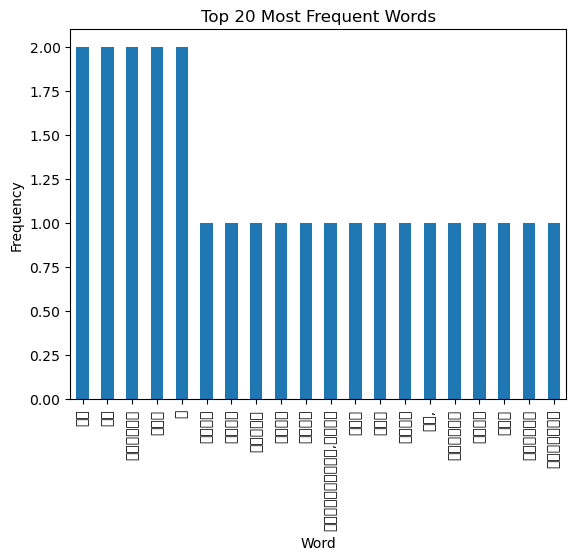

In [ ]:
import matplotlib.pyplot as plt
# Split the sentence column into words
words = df['sentence'].str.split(expand=True).stack()

# Calculate the frequency of each word
word_counts = words.value_counts()

# Plot a bar chart of the top 20 most frequent words
word_counts.head(20).plot(kind='bar')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words')
plt.show()

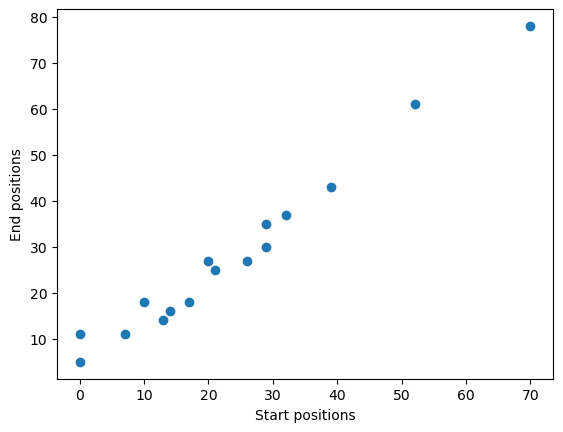

In [ ]:
import matplotlib.pyplot as plt

# define a function to extract the positions of $ $
def get_span_positions(text):
    positions = []
    start = 0
    while True:
        start = text.find('$', start)
        if start == -1:
            break
        end = text.find('$', start+1)
        if end == -1:
            break
        positions.append((start, end))
        start = end + 1
    return positions

# apply the function to the 'gt' column
df['gt_span_positions'] = df['gt'].apply(get_span_positions)

# plot the positions
positions = [pos for positions in df['gt_span_positions'] for pos in positions]
x, y = zip(*positions)
plt.scatter(x, y)
plt.xlabel('Start positions')
plt.ylabel('End positions')
plt.show()


### plot based on span length

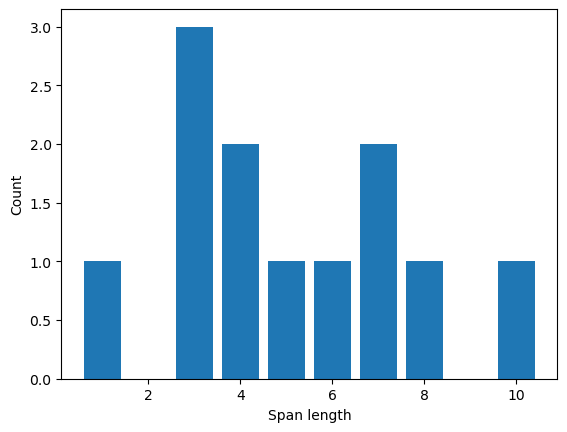

In [ ]:
import matplotlib.pyplot as plt

# define a function to compute the span lengths
def get_span_lengths(text):
    lengths = []
    start = 0
    while True:
        start = text.find('$', start)
        if start == -1:
            break
        end = text.find('$', start+1)
        if end == -1:
            break
        lengths.append(end - start - 1)
        start = end + 1
    return lengths

# apply the function to the 'gt' column
df['gt_span_lengths'] = df['gt'].apply(get_span_lengths)

# plot the distribution of span lengths
lengths = [length for lengths in df['gt_span_lengths'] for length in lengths]
plt.hist(lengths, bins=range(1, max(lengths)+2), align='left', rwidth=0.8)
plt.xlabel('Span length')
plt.ylabel('Count')
plt.show()


In [ ]:

# Select 5 random indices to apply the function to
random_indices = random.sample(range(len(df)), 5)

# Apply the function to the selected indices
df.loc[random_indices, 'gt_pred'] = df.loc[random_indices, 'sentence'].apply(insert_span)

In [ ]:
first_row_dict = df.iloc[2].to_dict()
print(first_row_dict)

{'sentence': 'কিন্তু এই সম্পর্ক যেমন বাবা মা, ভাই বোন,স্বামী স্ত্রী সব আছে কিন্তু তারপর ও অনেক কিছুই নেই।', 'gt': 'কিন্তু এই $সম্পর্ক$ যেমন বাবা মা, ভাই বোন,স্বামী স্ত্রী সব আছে কিন্তু $তারপর ও$ অনেক কিছুই নেই।', 'gt_pred': 'কিন্তু এই সম্পর্ক যেমন বাবা মা, ভাই বোন,স্বামী $স্ত্রী সব আছে কিন্তু তারপর ও অনেক কিছুই নেই।$', 'gt_span_positions': [(10, 18), (70, 78)], 'gt_span_lengths': [7, 7]}


In [ ]:
!pip install editdistance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 478.7 kB/s eta 0:00:00


In [ ]:
import editdistance

### Levenshtein distance is a text similarity measure that compares two words and returns a numeric value representing the distance between them. The distance reflects the total number of single-character edits required to transform one word into another. The more similar the two words are the less distance between them, and vice versa. 

Reference: https://towardsdatascience.com/text-similarity-w-levenshtein-distance-in-python-2f7478986e75
https://pypi.org/project/python-Levenshtein/

In [ ]:
import numpy

# Define the Levenshtein distance DP algorithm
def levenshteinDistanceDP(token1, token2):
    distances = numpy.zeros((len(token1) + 1, len(token2) + 1))

    for t1 in range(len(token1) + 1):
        distances[t1][0] = t1

    for t2 in range(len(token2) + 1):
        distances[0][t2] = t2

    for t1 in range(1, len(token1) + 1):
        for t2 in range(1, len(token2) + 1):
            if token1[t1 - 1] == token2[t2 - 1]:
                distances[t1][t2] = distances[t1 - 1][t2 - 1]
            else:
                distances[t1][t2] = min(distances[t1 - 1][t2], distances[t1][t2 - 1], distances[t1 - 1][t2 - 1]) + 1
    
    return distances[-1][-1]

In [ ]:


# Calculate the Levenshtein distance between 'gt' and 'gt_pred' columns as a single value
lev_distance = df.apply(lambda x: editdistance.eval(x['gt'], x['gt_pred']), axis=1).mean()


In [ ]:
lev_distance

5.0